In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re as r

In [2]:
football = pd.read_csv(r"C:\Users\HP\Downloads\numpy files\2020-2021.csv")
football

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


In [3]:
football.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [4]:
football.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89
379,E0,23/05/2021,16:00,Wolves,Man United,1,2,A,1,2,...,1.62,-0.25,2.04,1.86,2.10,1.84,2.10,1.94,2.00,1.88


In [5]:
football. describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.352632,1.342105,0.665789,0.605263,12.815789,11.363158,4.544737,4.084211,11.223684,10.550000,...,2.062421,-0.161842,1.950553,1.961211,1.962368,1.968079,2.009605,2.024868,1.935605,1.948079
std,1.320378,1.257722,0.825956,0.806945,5.490482,4.880602,2.594005,2.258555,3.438102,3.474768,...,0.380395,0.861898,0.101861,0.100985,0.105253,0.102970,0.105343,0.105101,0.095348,0.094764
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,1.390000,-2.500000,1.700000,1.580000,1.740000,1.560000,1.810000,1.640000,1.740000,1.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,3.000000,9.000000,8.000000,...,1.790000,-0.750000,1.870000,1.880000,1.880000,1.880000,1.910000,1.930000,1.860000,1.860000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,11.000000,4.000000,4.000000,11.000000,10.000000,...,2.000000,-0.250000,1.955000,1.970000,1.950000,1.970000,2.010000,2.030000,1.930000,1.950000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.250000,6.000000,5.250000,13.000000,13.000000,...,2.260000,0.250000,2.040000,2.050000,2.050000,2.060000,2.090000,2.110000,2.020000,2.030000
max,9.000000,7.000000,4.000000,4.000000,29.000000,28.000000,14.000000,14.000000,23.000000,21.000000,...,3.550000,2.250000,2.350000,2.160000,2.590000,2.230000,2.650000,2.400000,2.450000,2.180000


In [6]:
football.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

<Axes: >

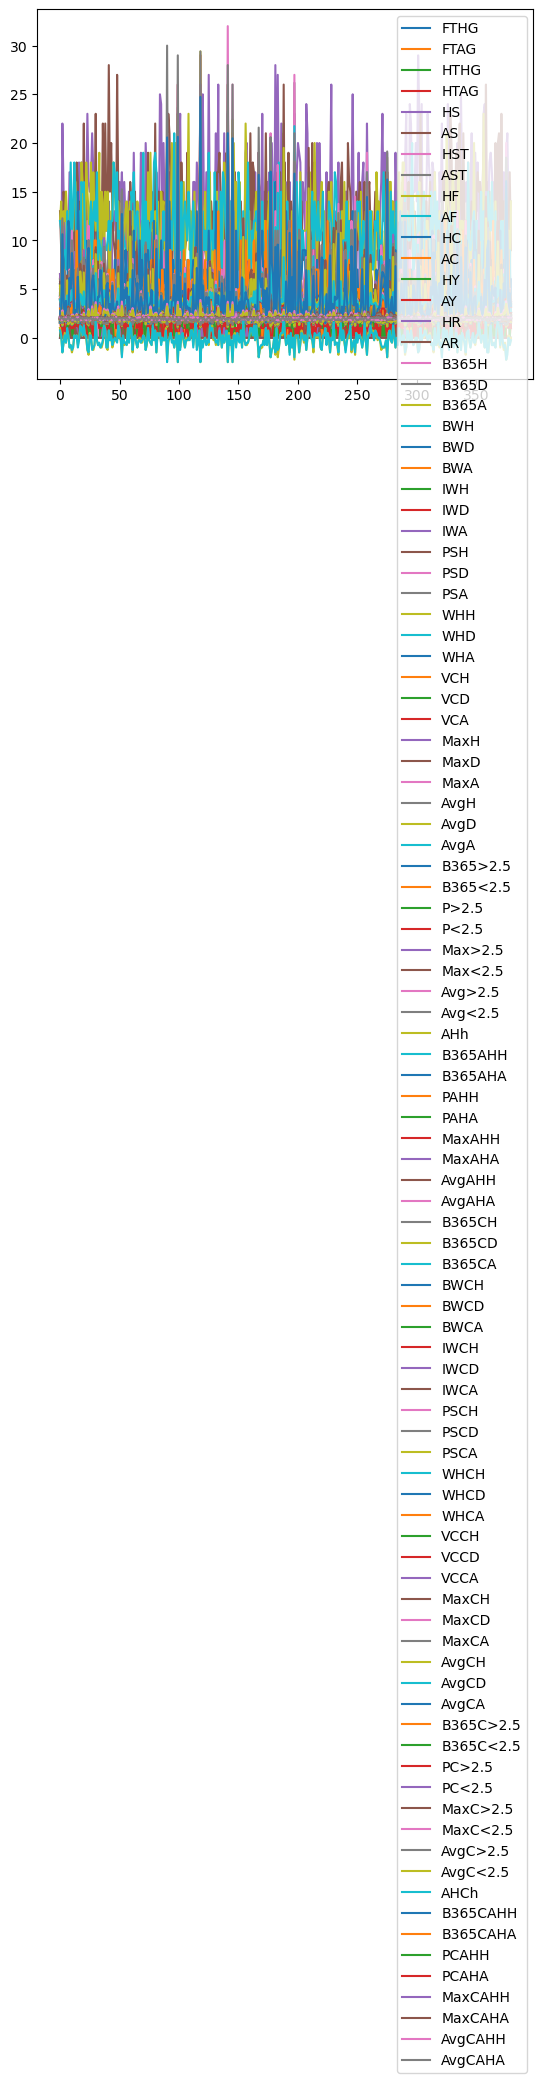

In [7]:
football.plot()

<Axes: >

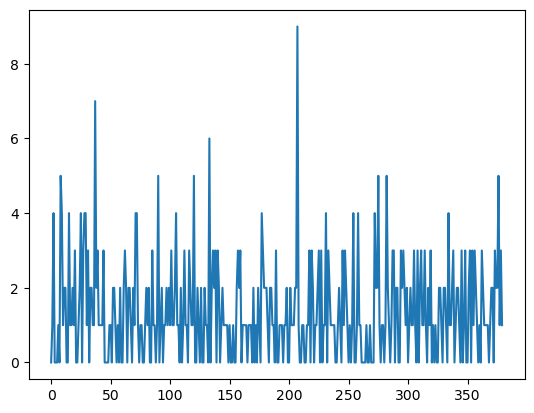

In [8]:
football['FTHG'].plot()

<Axes: xlabel='HomeTeam'>

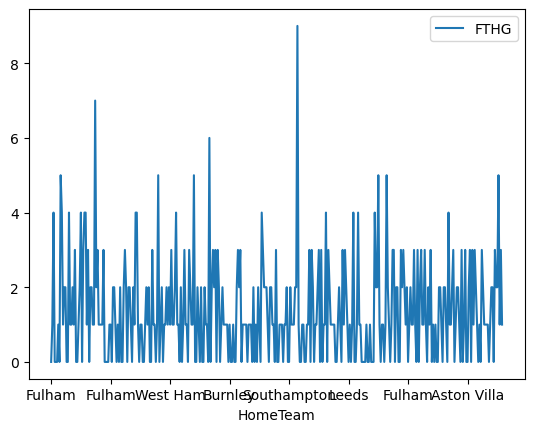

In [9]:
football.plot(x = 'HomeTeam', y = 'FTHG' )

<Axes: >

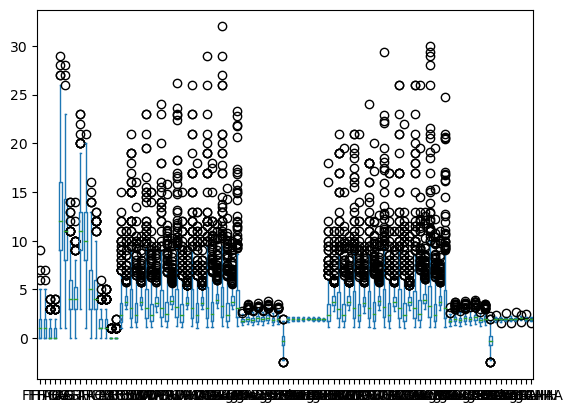

In [10]:
football.plot.box()

In [11]:
football.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [12]:
football['AwayTeam']

0             Arsenal
1         Southampton
2               Leeds
3           Newcastle
4           Leicester
            ...      
375    Crystal Palace
376           Everton
377           Burnley
378       Southampton
379        Man United
Name: AwayTeam, Length: 380, dtype: object

In [13]:
football['AwayTeam'][0:7]

0        Arsenal
1    Southampton
2          Leeds
3      Newcastle
4      Leicester
5        Everton
6        Chelsea
Name: AwayTeam, dtype: object

In [14]:
football.HomeTeam

0                Fulham
1        Crystal Palace
2             Liverpool
3              West Ham
4             West Brom
             ...       
375           Liverpool
376            Man City
377    Sheffield United
378            West Ham
379              Wolves
Name: HomeTeam, Length: 380, dtype: object

In [15]:
football.HomeTeam[1:10]

1      Crystal Palace
2           Liverpool
3            West Ham
4           West Brom
5           Tottenham
6            Brighton
7    Sheffield United
8             Everton
9               Leeds
Name: HomeTeam, dtype: object

In [16]:
football[['HomeTeam','AwayTeam','FTHG','FTAG']]

,HomeTeam,AwayTeam,FTHG,FTAG
0,Fulham,Arsenal,0,3
1,Crystal Palace,Southampton,1,0
2,Liverpool,Leeds,4,3
3,West Ham,Newcastle,0,2
4,West Brom,Leicester,0,3
...,...,...,...,...
375,Liverpool,Crystal Palace,2,0
376,Man City,Everton,5,0
377,Sheffield United,Burnley,1,0
378,West Ham,Southampton,3,0


In [17]:
football.iloc[2]

Div                 E0
Date        12/09/2020
Time             17:30
HomeTeam     Liverpool
AwayTeam         Leeds
               ...    
PCAHA             2.08
MaxCAHH            1.9
MaxCAHA           2.16
AvgCAHH           1.84
AvgCAHA           2.04
Name: 2, Length: 106, dtype: object

In [18]:
football.iloc[2:6]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,1.79,-0.50,2.09,1.81,2.09,1.85,2.16,1.86,2.08,1.81


In [19]:
football.loc[football['HomeTeam']=='Liverpool']

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
27,E0,28/09/2020,20:00,Liverpool,Arsenal,3,1,H,2,1,...,2.95,-1.25,2.07,1.83,2.06,1.87,2.13,1.89,2.05,1.84
52,E0,24/10/2020,20:00,Liverpool,Sheffield United,2,1,H,1,1,...,3.28,-2.00,2.01,1.92,2.00,1.91,2.02,2.03,1.96,1.92
61,E0,31/10/2020,17:30,Liverpool,West Ham,2,1,H,1,1,...,2.85,-1.25,1.91,1.99,1.93,2.00,1.94,2.04,1.90,1.99
85,E0,22/11/2020,19:15,Liverpool,Leicester,3,0,H,2,0,...,2.40,-0.75,2.05,1.88,2.05,1.88,2.08,1.93,2.01,1.88
105,E0,06/12/2020,19:15,Liverpool,Wolves,4,0,H,1,0,...,2.28,-1.00,2.01,1.92,2.00,1.92,2.02,2.03,1.96,1.90
123,E0,16/12/2020,20:00,Liverpool,Tottenham,2,1,H,1,1,...,2.27,-0.75,2.06,1.87,2.05,1.88,2.09,1.88,2.05,1.83
145,E0,27/12/2020,16:30,Liverpool,West Brom,1,1,D,1,0,...,3.36,-2.50,2.04,1.89,2.03,1.88,2.07,1.95,1.99,1.87
176,E0,17/01/2021,16:30,Liverpool,Man United,0,0,D,0,0,...,2.51,-0.50,1.96,1.94,1.94,1.98,2.01,1.98,1.94,1.93
183,E0,21/01/2021,20:00,Liverpool,Burnley,0,1,A,0,0,...,2.19,-1.25,1.83,2.10,1.86,2.07,1.86,2.27,1.78,2.13


In [20]:
football.sort_values('AwayTeam', ascending = False)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
190,E0,27/01/2021,18:00,Chelsea,Wolves,0,0,D,0,0,...,1.82,-0.75,1.84,2.09,1.84,2.10,1.86,2.12,1.82,2.06
357,E0,16/05/2021,14:05,Tottenham,Wolves,2,0,H,1,0,...,2.20,-1.00,1.97,1.96,1.96,1.96,1.99,2.05,1.91,1.96
75,E0,08/11/2020,14:00,Leicester,Wolves,1,0,H,1,0,...,1.62,-0.25,2.05,1.88,2.09,1.85,2.09,1.92,2.02,1.86
258,E0,02/03/2021,20:00,Man City,Wolves,4,1,H,1,0,...,2.11,-1.75,2.05,1.88,2.05,1.86,2.06,1.98,2.01,1.87
251,E0,27/02/2021,20:00,Newcastle,Wolves,1,1,D,0,0,...,1.56,0.25,2.05,1.88,2.04,1.88,2.06,1.92,2.02,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,E0,28/09/2020,20:00,Liverpool,Arsenal,3,1,H,2,1,...,2.95,-1.25,2.07,1.83,2.06,1.87,2.13,1.89,2.05,1.84
333,E0,02/05/2021,14:00,Newcastle,Arsenal,0,2,A,0,1,...,2.14,0.50,1.85,2.08,1.86,2.08,1.89,2.11,1.85,2.03
307,E0,11/04/2021,19:00,Sheffield United,Arsenal,0,3,A,0,1,...,1.91,0.75,2.08,1.85,2.07,1.86,2.12,1.89,2.05,1.84
40,E0,17/10/2020,17:30,Man City,Arsenal,1,0,H,1,0,...,2.70,-1.00,1.86,2.04,1.88,2.05,1.90,2.10,1.85,2.03


In [21]:
football.drop('Div', axis = 1, inplace = True)

In [22]:
print(football)

           Date   Time          HomeTeam        AwayTeam  FTHG  FTAG FTR  \
0    12/09/2020  12:30            Fulham         Arsenal     0     3   A   
1    12/09/2020  15:00    Crystal Palace     Southampton     1     0   H   
2    12/09/2020  17:30         Liverpool           Leeds     4     3   H   
3    12/09/2020  20:00          West Ham       Newcastle     0     2   A   
4    13/09/2020  14:00         West Brom       Leicester     0     3   A   
..          ...    ...               ...             ...   ...   ...  ..   
375  23/05/2021  16:00         Liverpool  Crystal Palace     2     0   H   
376  23/05/2021  16:00          Man City         Everton     5     0   H   
377  23/05/2021  16:00  Sheffield United         Burnley     1     0   H   
378  23/05/2021  16:00          West Ham     Southampton     3     0   H   
379  23/05/2021  16:00            Wolves      Man United     1     2   A   

     HTHG  HTAG HTR  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  \
0       0 

In [23]:
football.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,A,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,H,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,H,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,D,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,D,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
